## 1. Take a dataset containing points belonging to two classes in two dimensional space which is not linearly separable. Use kernel-SVM to classify the data.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns

In [9]:
X,y = make_classification(n_samples = 100,
                    n_features=2,
                    n_classes = 2,
                    n_informative=2,
                    n_redundant=0,
                    n_repeated=0,
                    n_clusters_per_class=1,
                    flip_y=0.1,
                    random_state=42)

In [10]:
X = pd.DataFrame(X)
X.head()

,0,1
0,2.502258,2.548817
1,-0.676214,1.412767
2,-1.310385,0.556563
3,2.075149,2.209383
4,0.974777,1.045987


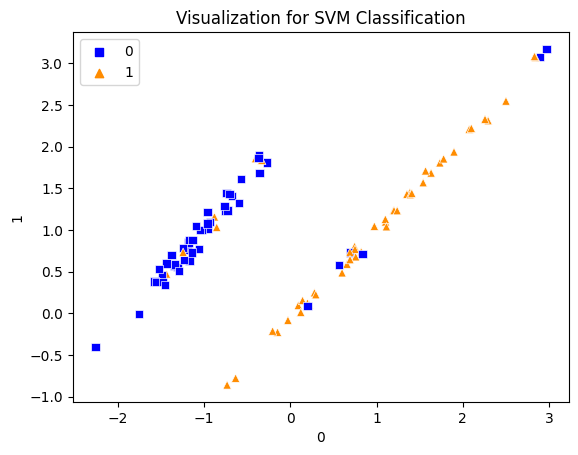

In [43]:
sns.scatterplot(x=0, y=1, hue=y, data=X, palette=['blue','darkorange'], style=y, markers={0: 's', 1: '^'})

plt.title('Visualization for SVM Classification')
plt.show()

In [143]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C':[0.1,10,100],
    'kernel':['linear','rbf'],
    'gamma':[0.1,10,1]
}
gs = GridSearchCV(SVC(),param_grid,cv=5,return_train_score=True, scoring='accuracy')

In [144]:
gs.fit(X,y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 10, 100], 'gamma': [0.1, 10, 1],
                         'kernel': ['linear', 'rbf']},
             return_train_score=True, scoring='accuracy')

In [146]:
gs.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [44]:
svm = SVC(C=100,gamma=1,kernel='rbf').fit(X,y)
y_pred = svm.predict(X)
accuracy_score(y,y_pred)

0.89

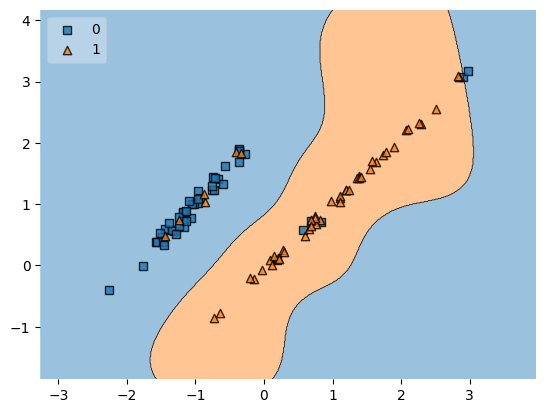

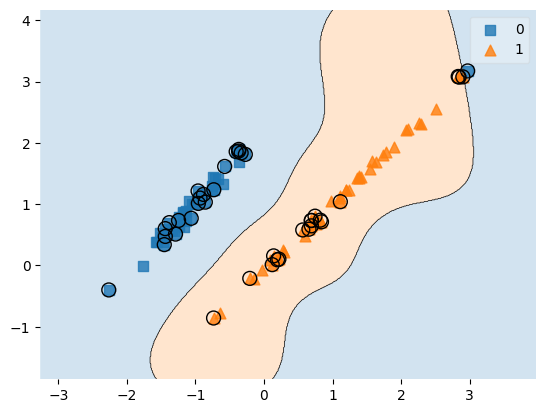

In [55]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X=np.array(X), 
                      y=y,
                      clf=svm,
                      legend=2)
plt.show()
plot_decision_regions(X=np.array(X), 
                      y=y_pred,
                      clf=svm, # 's' for support vectors
                      scatter_kwargs={'s': 60, 'edgecolor': None, 'linewidth': 1.0},
                      contourf_kwargs={'alpha': 0.2})
sv = svm.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], marker='o', s=100, c='none', edgecolors='k', label='Support Vectors')

plt.show()

## 2. For the dataset used in experiment 4, use SVM for newsgroup classification (multiclass classification). Compare the results with the methods used in experiment 4.


In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [2]:

newsgroups = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)
documents = newsgroups.data
labels = newsgroups.target
X_train, X_test, y_train, y_test = train_test_split(documents, labels, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

svm_classifier.fit(X_train_tfidf, y_train)

y_pred = svm_classifier.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=newsgroups.target_names))

Accuracy: 0.87
Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.88      0.89      0.88       151
           comp.graphics       0.71      0.80      0.76       202
 comp.os.ms-windows.misc       0.81      0.79      0.80       195
comp.sys.ibm.pc.hardware       0.68      0.74      0.71       183
   comp.sys.mac.hardware       0.86      0.83      0.85       205
          comp.windows.x       0.85      0.82      0.83       215
            misc.forsale       0.85      0.82      0.83       193
               rec.autos       0.86      0.90      0.88       196
         rec.motorcycles       0.96      0.92      0.94       168
      rec.sport.baseball       0.91      0.95      0.93       211
        rec.sport.hockey       0.96      0.93      0.95       198
               sci.crypt       0.98      0.93      0.95       201
         sci.electronics       0.79      0.79      0.79       202
                 sci.med       0.92  